In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import statsmodels.api as sm
import seaborn as sb
from scipy import stats
import matplotlib

In [2]:
data_dir = '/Users/gbromley/data/GPCC/'
file_name = 'precip.mon.total.v7.nc'
data = xr.open_dataset(data_dir+file_name)

In [3]:
#subset region we care about
#looking at replacing this with shapefile subset
precip = data.sel(lat=slice(50,40), lon=slice(246,266))

In [50]:
#get the time series by spatial average
ts_precip = precip.mean(dim=['lat','lon'])
ts_precip = ts_precip.sel(time=slice('1950-01-01','2009-12-01'))['precip']
ts_precip = ts_precip.groupby('time.year').mean()

In [52]:
ts_precip

<xarray.DataArray 'precip' (year: 60)>
array([ 36.999221,  41.915894,  29.623041,  38.083334,  34.865939,  34.675331,
        31.538745,  41.230393,  32.101863,  35.749588,  31.920462,  32.678066,
        41.58774 ,  37.088201,  38.702133,  43.888528,  32.565115,  36.410848,
        40.055019,  36.051472,  37.859812,  39.200747,  38.254431,  39.744511,
        31.118177,  41.330083,  28.710791,  42.628761,  40.10668 ,  33.903844,
        33.725889,  37.153671,  45.474907,  39.251033,  37.895234,  37.141791,
        44.3432  ,  35.516831,  28.127409,  33.566652,  34.085829,  41.725601,
        36.905144,  48.738583,  36.269742,  44.601478,  40.710051,  38.433085,
        44.063021,  38.963477,  36.73674 ,  34.873767,  32.531125,  33.471781,
        39.093318,  42.136833,  33.401902,  40.457989,  41.035735,  39.414795])
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 ...

In [62]:
#smooth the time series
lowess = sm.nonparametric.lowess(ts_precip.values,ts_precip.year.values, frac=0.1, return_sorted=False)

In [54]:
#linear regression
medslope, medintercept, lo_slope, up_slope = stats.theilslopes(np.arange(0,len(ts_precip.values)),ts_precip.values)

In [60]:
line = (medslope/10)*np.arange(0,len(ts_precip.values))+34
up_bound = (up_slope/10)*np.arange(0,len(ts_precip.values))+34
lo_bound = (lo_slope/10)*np.arange(0,len(ts_precip.values))+34



In [59]:
medintercept

-4.9536952594757651

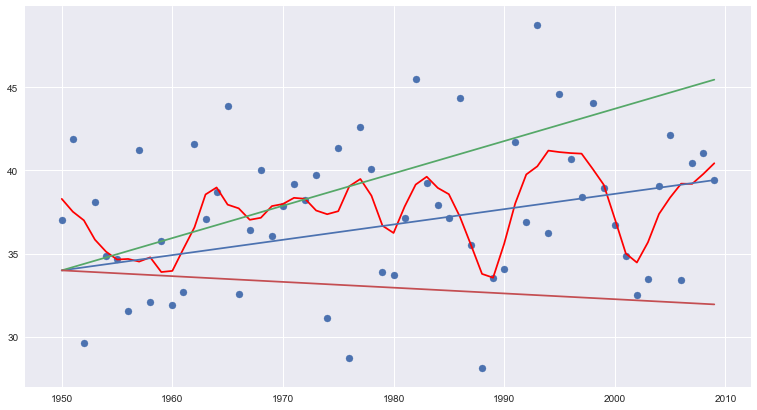

In [63]:
fig, ax = plt.subplots();
fig.set_size_inches(13,7)
fig.set_dpi=1200.0
#smoothed ts
ax.plot(ts_precip.year.values, lowess, c='red')
ax.scatter(ts_precip.year.values, ts_precip.values)
#trend
ax.plot(ts_precip.year.values, line)
ax.plot(ts_precip.year.values, up_bound)
ax.plot(ts_precip.year.values, lo_bound)

In [44]:
medslope/10

0.041348567214730167

In [ ]:
sb.tsplot(x=ts_precip.index, y=ts_precip.values)

In [ ]:
matplotlib.matplotlib_fname()